# Trực quan hóa bộ dữ liệu về bệnh đau tim  

In [2]:
# Load package
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random

In [3]:
# Load dataset
path = 'data/heart-failure-prediction/heart.csv'
df = pd.read_csv(path)
df.head(5)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
# Thông tin dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [5]:
# Kiểm tra số lượng phần tử rỗng trong df 
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [6]:
# Phân loại biến
max_cate_var = 0
numeric_cols = [col_name for col_name in df.select_dtypes(include='number')]
categorical_cols = [col_name for col_name in df.select_dtypes(exclude='number')]
for col in categorical_cols:
    if len(df[col].unique()) > max_cate_var:
        max_cate_var = len(df[col].unique())
print(numeric_cols)
print(categorical_cols)

['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak', 'HeartDisease']
['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']


In [7]:
# Tạo khung màu
pals = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)]) for _ in range(max_cate_var)]
print(pals)

['#C70D08', '#D71F5D', '#7A0DC8', '#8B85C6']


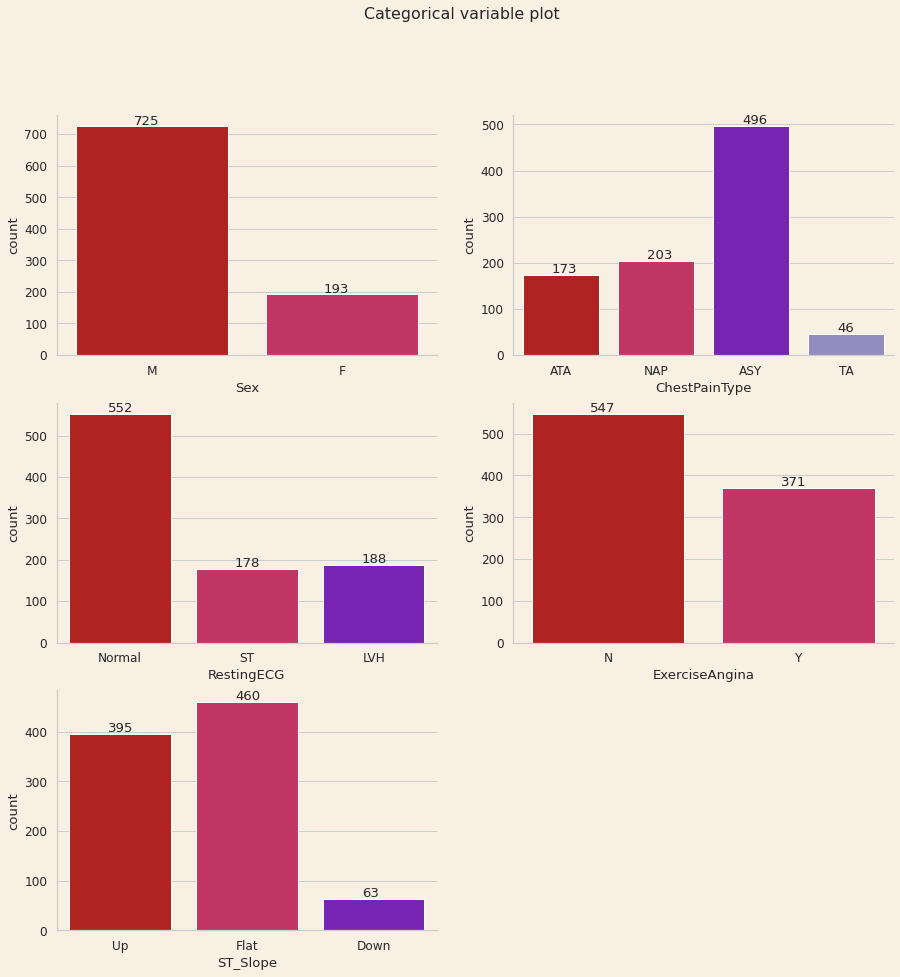

In [8]:
# Biểu đồ các biến phân loại
sns.set(
    style = 'whitegrid',
    font = 'DejaVu Sans', 
    font_scale = 1.1, 
    rc = {
        'axes.facecolor':'#f8f0e3',
        'figure.facecolor':'#f8f0e3',
        "axes.spines.right": False, 
        "axes.spines.top": False
})
fig, axes = plt.subplots(3, 2, sharex=False, figsize=(15, 15))
axes[-1, -1].axis('off')
fig.suptitle('Categorical variable plot')
i, j = 0, 0
for cl in categorical_cols: 
    num_col = len(np.unique(df[cl]))
    t = np.unique(df[cl])
    draw = sns.countplot(x=cl, data=df, palette=pals[:num_col+1], ax=axes[i, j])
    for d in draw.patches:
        draw.annotate('{}'.format(int(d.get_height())), (d.get_x()+.305, d.get_height()+5))
    if j < 1:
        j += 1
    else:
        i += 1
        j = 0

In [9]:
# Tạo data frame mới
new_df = pd.DataFrame()
new_df = df.copy()

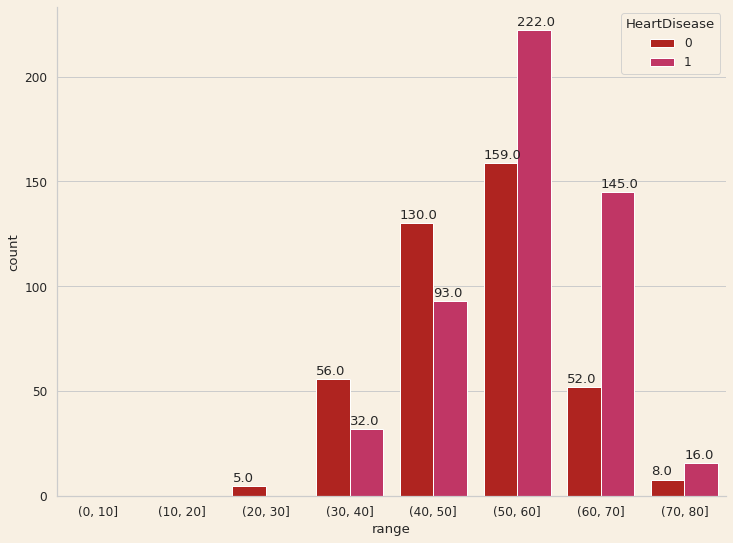

In [10]:
# Mối liên hệ giữa độ tuổi và bệnh tim  
new_df['range'] = pd.cut(new_df['Age'], [0, 10, 20, 30, 40, 50, 60 ,70, 80])
plt.figure(figsize=(12, 9))
draw = sns.countplot(x='range', data = new_df, hue='HeartDisease', palette=pals)
for d in draw.patches:
        draw.annotate('{}'.format(d.get_height()), (d.get_x(), d.get_height()+2))

Những người trong khoảng độ tuổi từ 50 đến 60 có tỉ lệ bị bệnh tim cao nhất

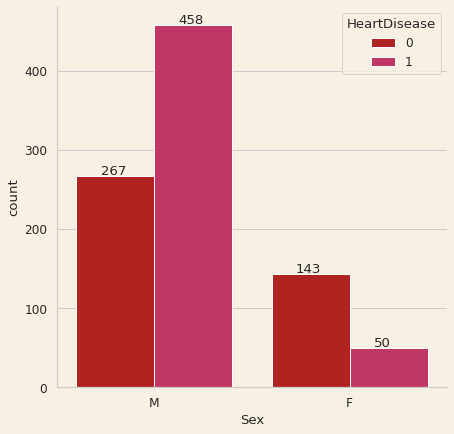

In [11]:
# Mối liên hệ giữa giới tính và bệnh tim
plt.figure(figsize=(7, 7))
draw = sns.countplot(x='Sex', data = df, hue = 'HeartDisease', palette=pals)
for d in draw.patches:
    draw.annotate('{}'.format(d.get_height()), (d.get_x()+.125, d.get_height()+2))

In [12]:
# Tính tỉ lệ 
heart_at_m = df.where(df['Sex'] == 'M').where(df['HeartDisease'] == 1).groupby(['Sex', 'HeartDisease'])['Sex'].count()
heart_at_f = df.where(df['Sex'] == 'F').where(df['HeartDisease'] == 1).groupby(['Sex', 'HeartDisease'])['Sex'].count()
m = df[df['Sex']=='M']['Sex'].count()
f = df[df['Sex']=='F']['Sex'].count()
print("Male's heart attack percentage: {:.2f}%".format(float(heart_at_m/m)*100))
print("Female's heart attack percentage: {:.2f}%".format(float(heart_at_f/f)*100))

Male's heart attack percentage: 63.17%
Female's heart attack percentage: 25.91%


Đàn ông có tỉ lệ bị mắc bệnh cao hơn phụ nữ khoảng 2.4 lần 

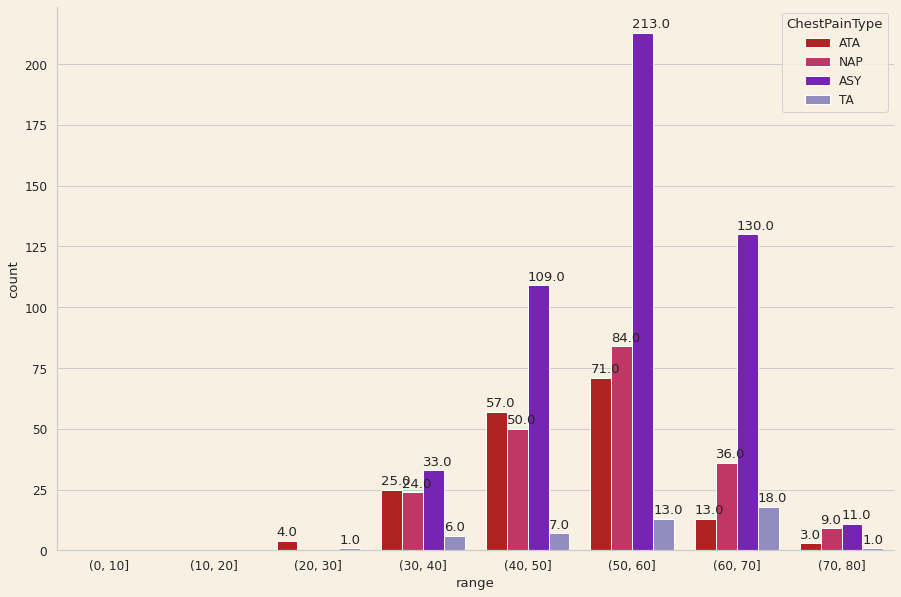

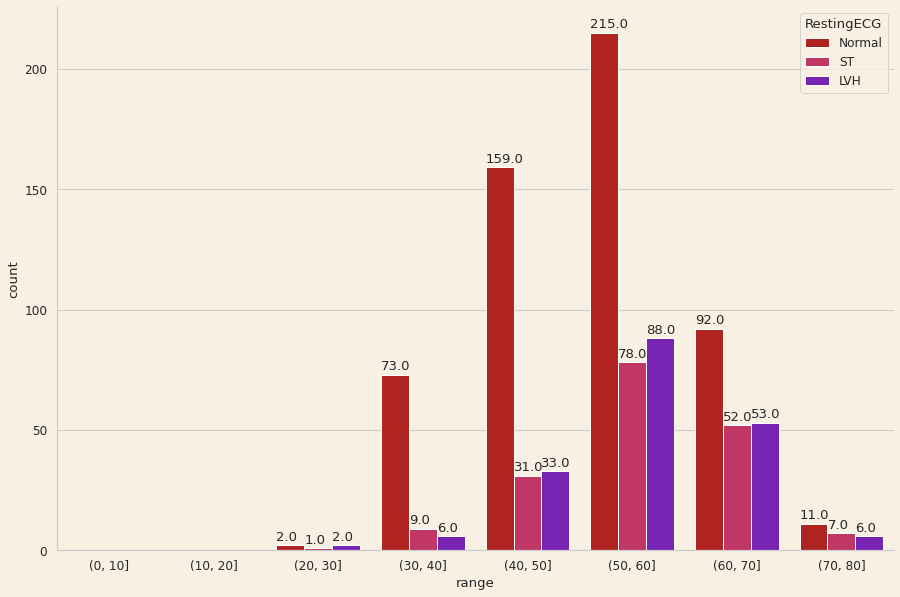

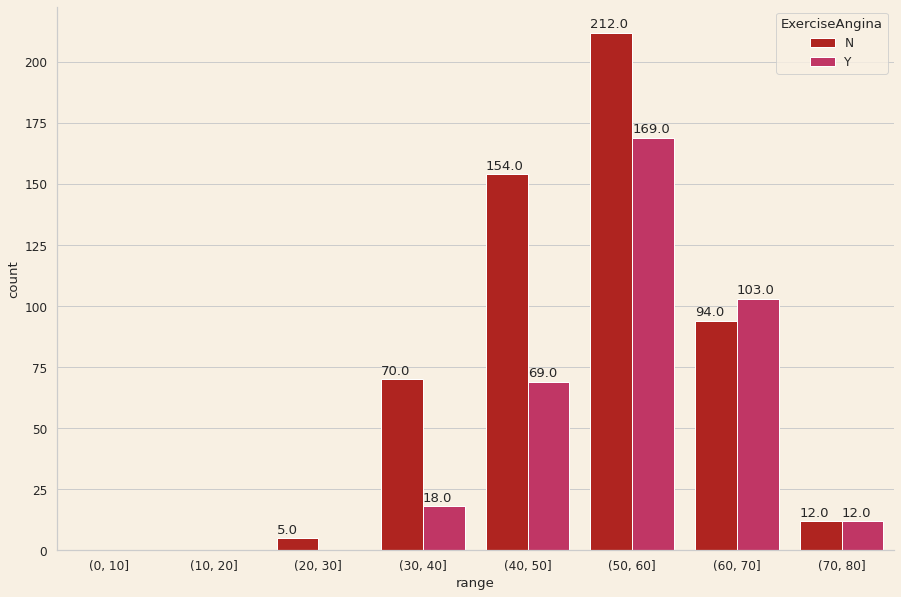

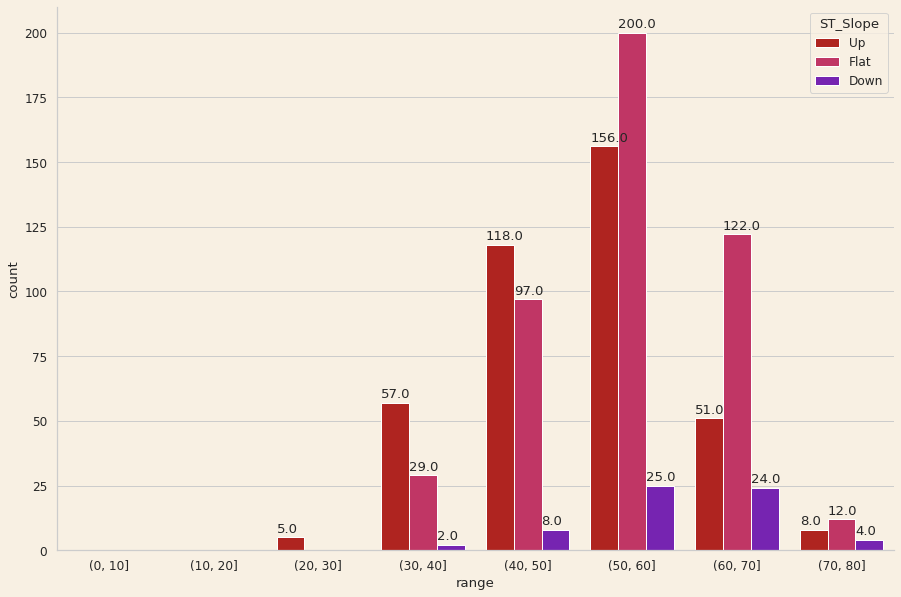

In [13]:
# Sự tương quan của độ tuổi vs các thành phần bệnh lý khác 
for cl in categorical_cols:
    if cl not in ['Sex', 'HeartDisease']:
        plt.figure(figsize=(15, 10))
        draw = sns.countplot(x='range', data = new_df, hue=cl, palette=pals)
        for d in draw.patches:
            draw.annotate('{}'.format(d.get_height()), (d.get_x(), d.get_height()+2))

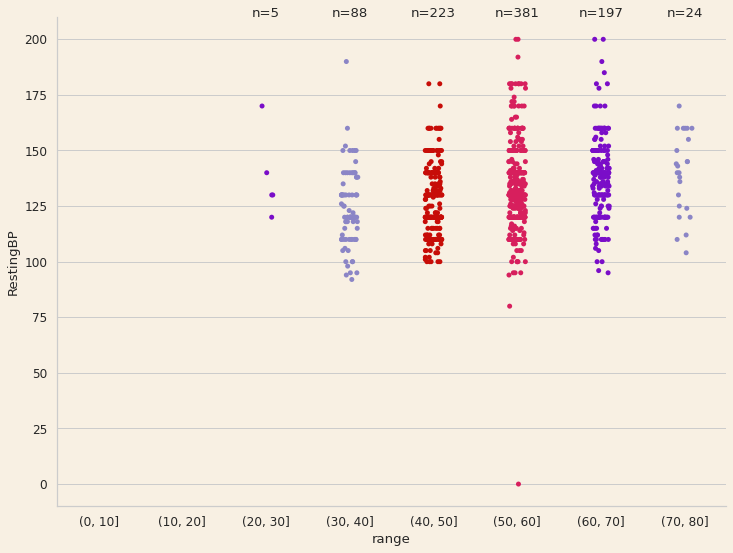

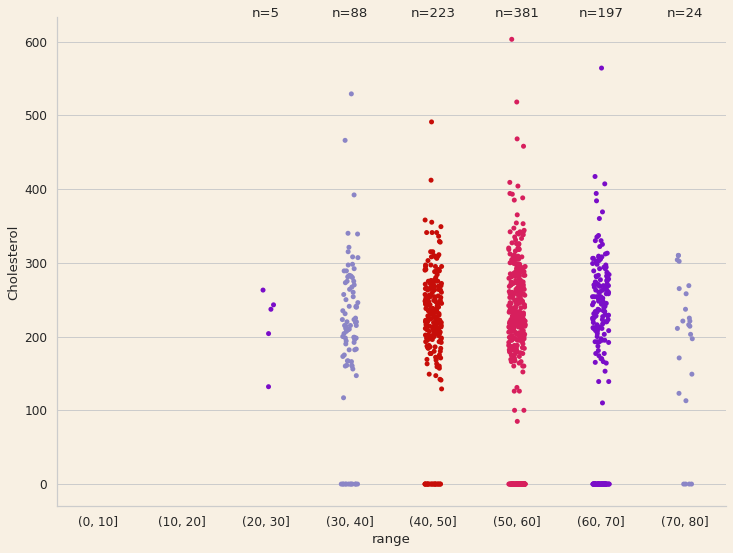

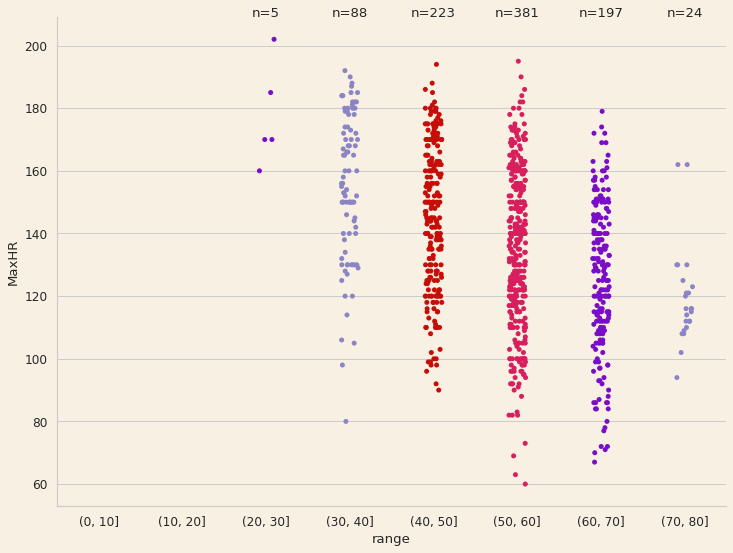

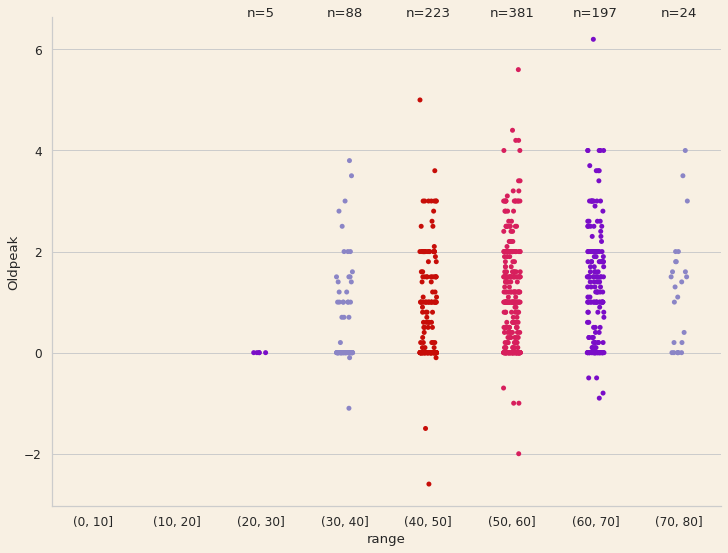

In [14]:
for c in numeric_cols:
    if c not in ['Age','FastingBS', 'HeartDisease']:
        plt.figure(figsize=(12, 9))
        draw = sns.stripplot(x='range', y = c, data = new_df, palette=pals)
        nobs = new_df.groupby('range')[c].count()
        for i,n in enumerate(nobs):
            if n != 0:
                draw.annotate(f'n={n}', xy=(i,1), xycoords=('data','axes fraction'), ha='center')